In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def get_normal_distribution(N, mean = 0., variance = 1.):
    return np.random.normal(mean, np.sqrt(variance), N)



def get_random_label(labels = [-1, 1]):
    random_val = random.random()
    if len(labels) == 2:
        if random_val < 1/len(labels):
            return labels[0]
        else:
            return labels[1]
      

    
def generate_dataset(N, P):
    dataset = []
    for i in range(P):
        ksi_i = get_normal_distribution(N)
        S_i = get_random_label()
        dataset.append((ksi_i, S_i))
    return np.array(dataset)

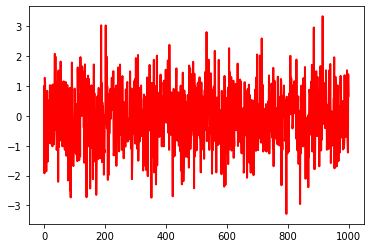

In [3]:
ksi = get_normal_distribution(1000)

plt.plot( ksi,linewidth=2, color='r')
plt.show()

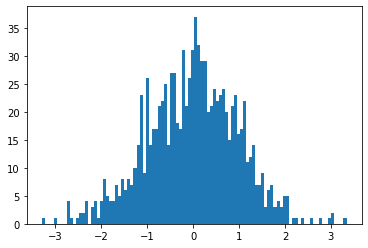

In [4]:
plt.hist(ksi, 100)
plt.show()

In [5]:
D_100_200 = generate_dataset(20, 30)


In [6]:
class RosenblattPerceptron:
    
    def __init__(self, D, max_epochs = 10, c = 0):
        self.debug = False
        self.N = len(D[0][0])
        self.P = len(D[:])
        self.D = D
        self.W = np.zeros(self.N)
        self.E = -1
        self.c = c
        if self.debug:
            print("N=",self.N)
            print("P=",self.P)
            self.print_internals()
        self.max_epochs = max_epochs
        self.current_epoch = 0
        self.current_data = 0
        
    def single_perceptron_update(self):
        ksi_i = self.D[self.current_data][0]
        S_i = self.D[self.current_data][1]
        if (self.current_data > 0 or self.current_epoch > 0):
            self.E = np.dot(self.W, ksi_i)
            self.E = self.E * S_i
        update = (ksi_i * S_i)/self.N
        if self.E < self.c:        
            self.W += update
            self.current_data += 1
        else:
            self.current_data += 1
        if self.debug:
            self.print_internals()
    
    def print_internals(self):
        print("E=",self.E)
        print("W=",self.W)
            
            
    def print_report(self):
        print("Training completed at epoch: ", self.current_epoch)
        print("resulting in weights:")
        print(self.W)
            
            
            
    def run_epoch(self):
        if self.debug:
            print(self.current_epoch)
        count = 0
        while self.current_data < self.P:
            self.single_perceptron_update()
            if self.E >= self.c:
                if self.debug:
                    print("updating count for value", self.E)
                    print("New count value", count+1)
                count += 1
        if count == self.P: 
            self.current_data = 0
            return True
        else:
            self.current_data = 0
            self.current_epoch += 1
            return False
        
    def run_training(self):
        success = False
        while self.current_epoch < self.max_epochs:
             if self.run_epoch():
                    success = True
                    break
        if self.debug:
            self.print_report()
        return success

        

In [7]:
perceptron = RosenblattPerceptron(D_100_200)

In [8]:
#perceptron.debug = True
#perceptron.run_training()

In [9]:


def run_experiment(N_exp = 50, n_max = 150, n_d = 50, alpha_range = 10, c = 0):
    Q = np.zeros(alpha_range)
    for i in range(alpha_range):
        alpha = 0.5 + 2.5 * i/alpha_range
        P = (int) (alpha*N_exp)
        datasets = []
        for j in range(n_d):
            datasets.append(generate_dataset(N_exp, P))
        for dataset in datasets:
            perceptron = RosenblattPerceptron(dataset, n_max, c)
            if perceptron.run_training():
                Q[i] += 1
        Q[i] = Q[i]/n_d
    results = dict()
    for i in range(alpha_range):
        alpha = 0.5 + 2.5 * i/alpha_range
        results[alpha] = Q[i]
    return (results, N_exp, c)

def display_results(results):
    plt.figure(figsize=(20,10))
    for result in results:
        x = list(result[0].keys())
        y = list(result[0].values())
        plt.plot(x,y, label="N=%d"%result[1]+" c=%4.3f"%result[2])
    plt.legend( shadow=True, fontsize='large')
    plt.show()

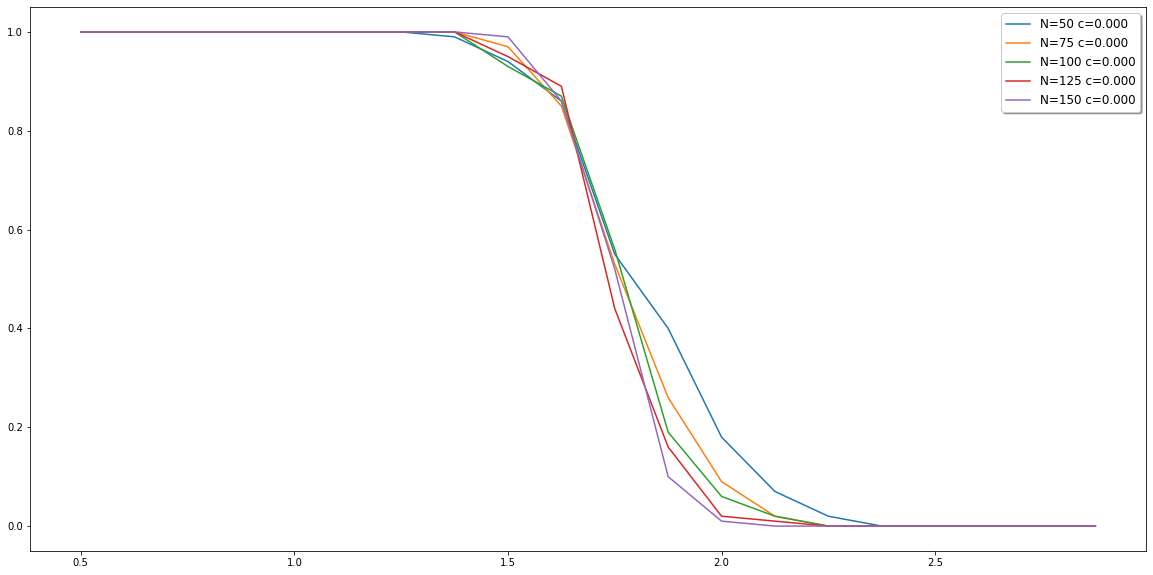

In [10]:
N_trials = [50, 75, 100, 125, 150]
c_trials = [0.0, 0.005, 0.01, 0.05, 0.1]
N_results = []
for n in N_trials:
    N_results.append(run_experiment(N_exp = n, n_max = 200, n_d = 100, alpha_range = 20, c = 0))
display_results(N_results)

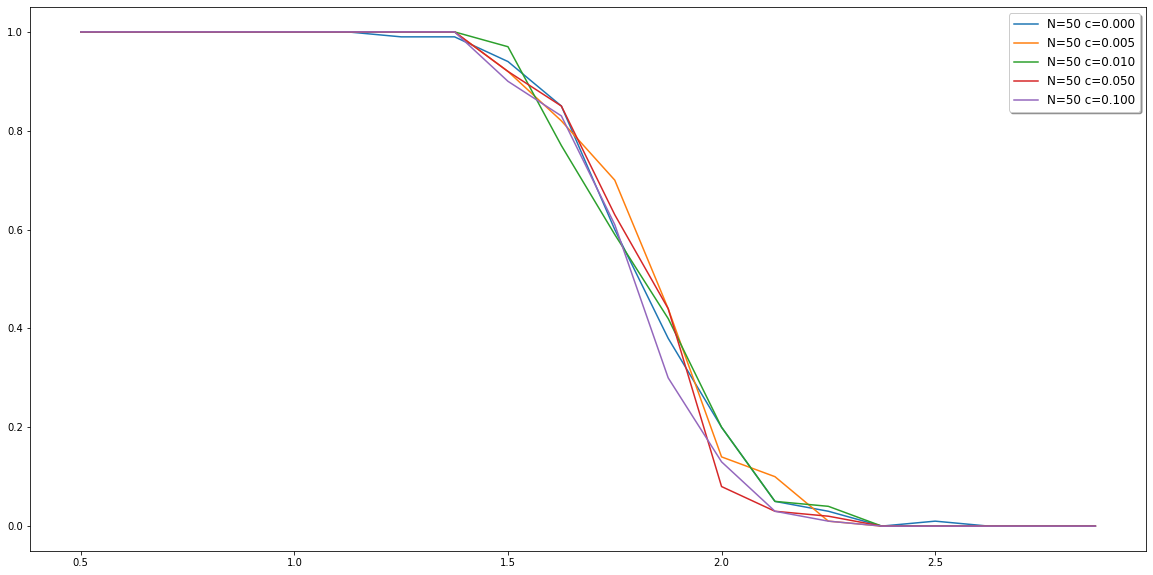

In [11]:
c_results = []
for c in c_trials:
    c_results.append(run_experiment(N_exp = 50, n_max = 200, n_d = 100, alpha_range = 20, c = c))
display_results(c_results)

In [12]:
for result in c_results:
    print("N=%d"%result[1]+"c=%3.4f"%result[2])
    print(result[0])

N=50c=0.0000
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 0.99, 1.375: 0.99, 1.5: 0.94, 1.625: 0.85, 1.75: 0.6, 1.875: 0.38, 2.0: 0.2, 2.125: 0.05, 2.25: 0.03, 2.375: 0.0, 2.5: 0.01, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=50c=0.0050
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 1.0, 1.5: 0.92, 1.625: 0.82, 1.75: 0.7, 1.875: 0.44, 2.0: 0.14, 2.125: 0.1, 2.25: 0.01, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=50c=0.0100
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 1.0, 1.5: 0.97, 1.625: 0.77, 1.75: 0.59, 1.875: 0.42, 2.0: 0.2, 2.125: 0.05, 2.25: 0.04, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=50c=0.0500
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 1.0, 1.5: 0.92, 1.625: 0.85, 1.75: 0.63, 1.875: 0.44, 2.0: 0.08, 2.125: 0.03, 2.25: 0.02, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=50c=0.1000
{0.5:

In [13]:
for result in N_results:
    print("N=%d"%result[1]+"c=%3.4f"%result[2])
    print(result[0])

N=50c=0.0000
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 0.99, 1.5: 0.94, 1.625: 0.86, 1.75: 0.55, 1.875: 0.4, 2.0: 0.18, 2.125: 0.07, 2.25: 0.02, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=75c=0.0000
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 1.0, 1.5: 0.97, 1.625: 0.85, 1.75: 0.53, 1.875: 0.26, 2.0: 0.09, 2.125: 0.02, 2.25: 0.0, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=100c=0.0000
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 1.0, 1.5: 0.93, 1.625: 0.87, 1.75: 0.56, 1.875: 0.19, 2.0: 0.06, 2.125: 0.02, 2.25: 0.0, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=125c=0.0000
{0.5: 1.0, 0.625: 1.0, 0.75: 1.0, 0.875: 1.0, 1.0: 1.0, 1.125: 1.0, 1.25: 1.0, 1.375: 1.0, 1.5: 0.95, 1.625: 0.89, 1.75: 0.44, 1.875: 0.16, 2.0: 0.02, 2.125: 0.01, 2.25: 0.0, 2.375: 0.0, 2.5: 0.0, 2.625: 0.0, 2.75: 0.0, 2.875: 0.0}
N=150c=0.0000
{0.